In [287]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Predicting who Survives on the Titanic 

Use machine learning to determine who dies, and who survives, on the Titanic. 

Logistic regression and random forest models will be tested. 

This project is broken into 6 steps: 
1. [Problem Definition](#problem_definition)
2. [Gathering Data / Information](#get_data)
3. [Data Cleaning / Imputation](#clean)
4. [Exploratory Analysis](#explore)
5. [Model Fitting](#fit)
6. [Interpret Results](#interpret)

# 1. Problem definition <a id='problem_definition'></a>

Given a test data set of who survived and didn't survive, can a model be created that can predict whether or not someone would survive the titanic disaster.  

Check this model against the test data. 


# 2. Gathering Data / Information <a id='get_data'></a>

In [289]:
data = pd.read_csv('train.csv', sep=",")
labels = np.array(data['Survived'])

train, test, train_survial, test_survival = train_test_split(data, labels, test_size = 0.25, random_state = 42)
combine = [train, test]

## Training Data

In [290]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.50,C106,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.05,NaN,S


In [291]:
train.shape

(668, 12)

In [292]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Survived     668 non-null    int64  
 2   Pclass       668 non-null    int64  
 3   Name         668 non-null    object 
 4   Sex          668 non-null    object 
 5   Age          536 non-null    float64
 6   SibSp        668 non-null    int64  
 7   Parch        668 non-null    int64  
 8   Ticket       668 non-null    object 
 9   Fare         668 non-null    float64
 10  Cabin        149 non-null    object 
 11  Embarked     666 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 67.8+ KB


There are 132 null values for age. 

In [295]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,668.000000,668.000000,668.000000,536.000000,668.000000,668.000000,668.000000
mean,447.450599,0.378743,2.333832,29.421343,0.553892,0.372754,32.179397
std,258.038366,0.485437,0.823707,14.526010,1.185279,0.795588,51.604012
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.750000,0.000000,2.000000,20.750000,0.000000,0.000000,7.925000
50%,452.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.400000
75%,673.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [296]:
print(train['Pclass'].unique())
print(train['Pclass'].value_counts().sort_index())

[1 3 2]
1    152
2    141
3    375
Name: Pclass, dtype: int64


## Test Data 

In [297]:
test.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S


In [298]:
test.shape

(223, 12)

In [299]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 709 to 424
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  223 non-null    int64  
 1   Survived     223 non-null    int64  
 2   Pclass       223 non-null    int64  
 3   Name         223 non-null    object 
 4   Sex          223 non-null    object 
 5   Age          178 non-null    float64
 6   SibSp        223 non-null    int64  
 7   Parch        223 non-null    int64  
 8   Ticket       223 non-null    object 
 9   Fare         223 non-null    float64
 10  Cabin        55 non-null     object 
 11  Embarked     223 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 22.6+ KB


## Both

Make male/female categorical 

In [300]:
for dataset in combine:
    dataset['isFemale'] = np.where(dataset['Sex'] == 'female', 1, 0)
    dataset.drop(columns=['PassengerId','Ticket', 'Cabin', 'Embarked'], inplace=True)    

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,isFemale
298,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,30.5000,0
884,0,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,7.0500,0
247,1,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,14.5000,1
478,0,3,"Karlsson, Mr. Nils August",male,22.00,0,0,7.5208,0
305,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,0


# 3. Data Cleaning / Imputation <a id='clean'></a>


# 4. Exploratory Analysis <a id='explore'></a>

## Investigate by Age

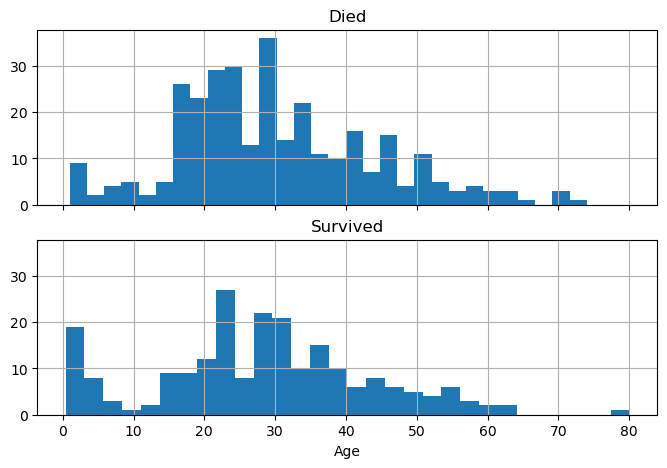

In [301]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,5), sharex=True, sharey=True)
ax1.hist(train.loc[(train['Survived'] == 0)]['Age'], 30) # green 
ax2.hist(train.loc[(train['Survived'] == 1)]['Age'], 30) # green 
ax1.set_title('Died')
ax2.set_title('Survived')
ax2.set(xlabel='Age')

plt.show()

The above shows that more young children survived, more young adults (20-30) died. 

## Investigate by Ticket Class

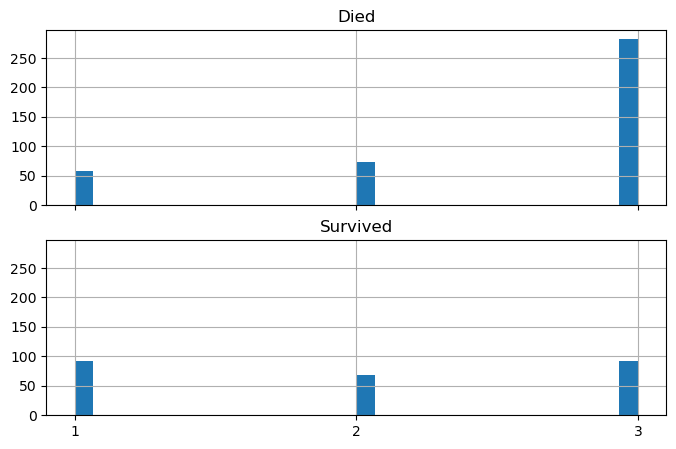

In [302]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,5), sharex=True, sharey=True)
ax1.hist(train.loc[(train['Survived'] == 0)]['Pclass'], 30) # green 
ax2.hist(train.loc[(train['Survived'] == 1)]['Pclass'], 30) # green 
ax1.set_title('Died')
ax2.set_title('Survived')
plt.xticks([1,2,3])
plt.show()

People of ticket class 3 were more likely to die. 
People of ticket class 1 were more likely to survive. 

In [304]:
survive_1 = train[(train['Pclass'] == 1) & (train['Survived'] == 1)]['Survived'].count()
survive_2 = train[(train['Pclass'] == 2) & (train['Survived'] == 1)]['Survived'].count()
survive_3 = train[(train['Pclass'] == 3) & (train['Survived'] == 1)]['Survived'].count()
print(f"{round(survive_1/152*100)}% of class 1 passengers survived")
print(f"{round(survive_2/141*100)}% of class 2 passengers survived")
print(f"{round(survive_3/375*100)}% of class 3 passengers survived")

61% of class 1 passengers survived
48% of class 2 passengers survived
25% of class 3 passengers survived


## Investigate by Sex 

In [305]:
survive_m = train[(train['Sex'] == 'male') & (train['Survived'] == 1)]['Survived'].count()
survive_f = train[(train['Sex'] == 'female') & (train['Survived'] == 1)]['Survived'].count()

num_f = train['Sex'].value_counts()['female']
num_m = train['Sex'].count() - num_f
print(f"{round(survive_m/num_m*100)}% of males survived")
print(f"{round(survive_f/num_f*100)}% of females survived")

19% of males survived
74% of females survived


## Investigate how Fare and Ticket Class are Related

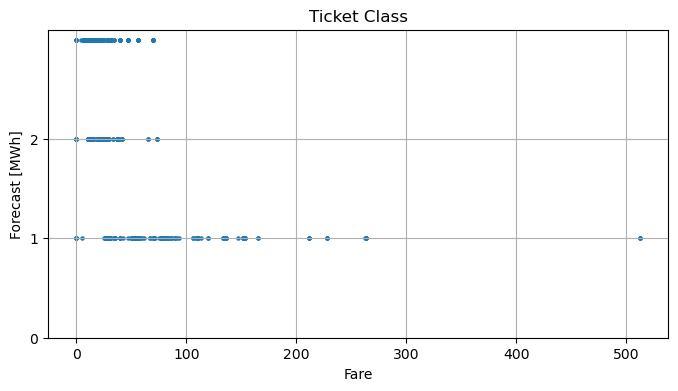

In [306]:
plt.figure(figsize=(8,4))
plt.title('Ticket Class')
plt.xlabel("Fare")
plt.ylabel("Forecast [MWh]")
plt.scatter(train['Fare'], train['Pclass'], s=5)
plt.yticks([0,1,2])

plt.show()

# 5. Model Fitting <a id='fit'></a>

In [ ]:
for df in combine: 
    df.drop(["Name", "Sex", "Fare"], axis=1, inplace=True)

In [321]:
train['Age'].fillna(train['Age'].dropna().median(), inplace=True)
test['Age'].fillna(test['Age'].dropna().median(), inplace=True)

## Logistic Regression 

**Creating test and train sets** for the models. 

In [322]:
# Predictors 
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("Survived", axis=1)
Y_test = test["Survived"]
X_train.shape, Y_train.shape, X_test.shape

((668, 5), (668,), (223, 5))

In [323]:
LR_model = LogisticRegression()
LR_model.fit(X_train, Y_train)

LogisticRegression()

In [324]:
survive_pred = LR_model.predict(X_test)

In [325]:
round(LR_model.score(X_test, Y_test)*100, 1)

81.6

## Random Forest 

In [331]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

72.65

# 6. Interpret Results <a id='interpret'></a>

Logistic Regression performed better than Random Forest. 

Age, sex, and ticket class are the most important predictors to determine survival rate. 